In [80]:
print(__doc__)

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy  
from scipy import linalg

from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale  
from sklearn import decomposition
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import style
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
import itertools

from sklearn import mixture


style.use("ggplot")
%matplotlib inline



Automatically created module for IPython interactive environment


In [81]:
#dataset2
raw_data = pd.read_csv('C:/Users/Chenming/Desktop/assignment3/Data3_income census/adult.csv')
#age: numeric
#fnlwgt: numeric
#delete education because education number is repeating to this feature
#education_num: numeric
#capital_gain:numeric
#capital_loss:numeric
#hours_per_week:numeric
#native_country: has too many non-numeric values, delete
data=raw_data
data.drop
data['age']=raw_data.age
data['age']=data.age.astype(int)
data['fnlwgt']=raw_data.fnlwgt
data['fnlwgt']=data.fnlwgt.astype(int)
data['education_num']=raw_data.education_num
data['education_num']=data.education_num.astype(int)
data['capital_gain']=raw_data.capital_gain
data['capital_gain']=data.capital_gain.astype(int)
data['capital_loss']=raw_data.capital_loss
data['capital_loss']=data.capital_loss.astype(int)
data['hours_per_week']=raw_data.hours_per_week
data['hours_per_week']=data.hours_per_week.astype(int)

#convert workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked
raw_data['workclass'] = raw_data.workclass.str.replace('Without-pay','0')
raw_data['workclass'] = raw_data.workclass.str.replace('Never-worked','1')
raw_data['workclass'] = raw_data.workclass.str.replace('Private','2')
raw_data['workclass'] = raw_data.workclass.str.replace('Self-emp-not-inc','3')
raw_data['workclass'] = raw_data.workclass.str.replace('Self-emp-inc','4')
raw_data['workclass'] = raw_data.workclass.str.replace('Federal-gov','5')
raw_data['workclass'] = raw_data.workclass.str.replace('Local-gov','6')
raw_data['workclass'] = raw_data.workclass.str.replace('State-gov','7')
raw_data['workclass'] = raw_data.workclass.str.replace('?','8')

data['workclass']=raw_data.workclass
data['workclass']=data.workclass.astype(int)

#convert marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse 
raw_data['marital_status'] = raw_data.marital_status.str.replace('Married-civ-spouse','0')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Divorced','1')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Never-married','2')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Separated','3')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Widowed','4')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Married-spouse-absent','5')
raw_data['marital_status'] = raw_data.marital_status.str.replace('Married-AF-spouse','6')
data['marital_status']=raw_data.marital_status
data['marital_status']=data.marital_status.astype(int)

#convert occupation:Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, 
#Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, 
#Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, 
#Armed-Forces
raw_data['occupation'] = raw_data.occupation.str.replace('Tech-support','0')
raw_data['occupation'] = raw_data.occupation.str.replace('Craft-repair','1')
raw_data['occupation'] = raw_data.occupation.str.replace('Other-service','2')
raw_data['occupation'] = raw_data.occupation.str.replace('Sales','3')
raw_data['occupation'] = raw_data.occupation.str.replace('Exec-managerial','4')
raw_data['occupation'] = raw_data.occupation.str.replace('Prof-specialty','5')
raw_data['occupation'] = raw_data.occupation.str.replace('Handlers-cleaners','6')
raw_data['occupation'] = raw_data.occupation.str.replace('Machine-op-inspct','7')
raw_data['occupation'] = raw_data.occupation.str.replace('Adm-clerical','8')
raw_data['occupation'] = raw_data.occupation.str.replace('Farming-fishing','9')
raw_data['occupation'] = raw_data.occupation.str.replace('Transport-moving','10')
raw_data['occupation'] = raw_data.occupation.str.replace('Priv-house-serv','11')
raw_data['occupation'] = raw_data.occupation.str.replace('Protective-serv','12')
raw_data['occupation'] = raw_data.occupation.str.replace('Armed-Forces','13')
raw_data['occupation'] = raw_data.occupation.str.replace('?','14')

data['occupation']=raw_data.occupation
data['occupation']=data.occupation.astype(int)

#relationship:Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried
raw_data['relationship'] = raw_data.relationship.str.replace('Wife','0')
raw_data['relationship'] = raw_data.relationship.str.replace('Own-child','1')
raw_data['relationship'] = raw_data.relationship.str.replace('Husband','2')
raw_data['relationship'] = raw_data.relationship.str.replace('Not-in-family','3')
raw_data['relationship'] = raw_data.relationship.str.replace('Other-relative','4')
raw_data['relationship'] = raw_data.relationship.str.replace('Unmarried','5')
data['relationship']=raw_data.relationship
data['relationship']=data.relationship.astype(int)

#race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black
raw_data['race'] = raw_data.race.str.replace('White','0')
raw_data['race'] = raw_data.race.str.replace('Asian-Pac-Islander','1')
raw_data['race'] = raw_data.race.str.replace('Amer-Indian-Eskimo','2')
raw_data['race'] = raw_data.race.str.replace('Other','3')
raw_data['race'] = raw_data.race.str.replace('Black','4')
data['race']=raw_data.race
data['race']=data.race.astype(int)

#sex: Female, Male
raw_data['sex'] = raw_data.sex.str.replace('Female','0')
raw_data['sex'] = raw_data.sex.str.replace('Male','1')
data['sex']=raw_data.sex
data['sex']=data.sex.astype(int)

#set label_name column
data['income_name'] = raw_data.income

#income: >50K, <=50K
raw_data['income'] = raw_data.income.str.replace('>50K','1')
raw_data['income'] = raw_data.income.str.replace('<=50K','0')
raw_data['income'] = raw_data.income
raw_data['income'] = raw_data.income.astype(int)

datalist_label = data.income
datalist_names = data.income_name
datalist_label_names = np.array(['>50K','<=50K'])
datalist = data.drop(['fnlwgt','education','native_country','income','income_name'], axis=1)
datalist_array = datalist.values
datalist_array

array([[   39,     7,    13, ...,  2174,     0,    40],
       [   50,     3,    13, ...,     0,     0,    13],
       [   38,     2,     9, ...,     0,     0,    40],
       ..., 
       [   58,     2,     9, ...,     0,     0,    40],
       [   22,     2,     9, ...,     0,     0,    20],
       [   52,     4,     9, ..., 15024,     0,    40]])

In [82]:
EM_data = data.drop(['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship','race','sex','capital_gain','capital_loss','hours_per_week','native_country'], axis=1)
EM_data.head()

,income,income_name
0,0,<=50K
1,0,<=50K
2,0,<=50K
3,0,<=50K
4,0,<=50K


In [83]:
#NN  on X = datalist_array, y = datalist_label
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.cross_validation import StratifiedKFold
import time
from sklearn.neural_network import MLPClassifier

skf = StratifiedKFold(datalist_label, n_folds=4)
# Only take the first fold.
train_index, test_index = next(iter(skf))


X_train = datalist_array[train_index]
y_train = datalist_label[train_index].values
X_test  = datalist_array[test_index]
y_test  = datalist_label[test_index].values

In [84]:
#implement rp on datalist
from sklearn import random_projection

In [85]:
# Compute RP
#  Higher values indicate a higher, sharper peak; lower values indicate a lower, less distinct peak
#if non-Fisher Kurtosis, nomral distribution is 3.  Closer to normal distribution is better for ML.
for i in range(1,6):
    rp = random_projection.GaussianRandomProjection(n_components = i)
    RP_ = rp.fit_transform(datalist)  # Reconstruct signals
    print ('component: ', i, ', Kurtosis: ', scipy.stats.kurtosis(RP_, fisher=False))

component:  1 , Kurtosis:  [ 157.67271668]
component:  2 , Kurtosis:  [  21.82930814  149.89511181]
component:  3 , Kurtosis:  [ 141.17687469  157.73868852   99.25449403]
component:  4 , Kurtosis:  [ 157.70080571  148.63161319  134.65259608  157.58590576]
component:  5 , Kurtosis:  [ 157.44529139  157.46080479  151.75332419  157.35986757  157.68682627]


In [86]:
rp_gaussian = random_projection.GaussianRandomProjection(n_components = 2)
data_RP = rp_gaussian.fit_transform(datalist)

In [87]:
data_RP

array([[-1196.22903266,  1118.22395125],
       [  -23.670244  ,   -24.67475137],
       [  -68.12353798,   -14.36161632],
       ..., 
       [  -72.66802189,   -20.19887669],
       [  -31.82303449,   -16.18284191],
       [-7868.30422482,  7798.44715138]])

In [88]:
#Try NN
#NN upon RP dataset
from sklearn.metrics import explained_variance_score

X_train = data_RP[train_index]
y_train = datalist_label[train_index].values
X_test  = data_RP[test_index]
y_test  = datalist_label[test_index].values

start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(50,10), max_iter=1000, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.03)

mlp.fit(X_train, y_train)
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
elapsed_time = time.time() - start_time

print("Training set score: %f" % mlp.score(X_train, y_train))
print ("Training variance: ", explained_variance_score(y_train, y_train_pred, multioutput='uniform_average'))
print("Test set score: %f" % mlp.score(X_test, y_test))
print ("Testing variance: ", explained_variance_score(y_test, y_test_pred, multioutput='uniform_average'))
print ("Running Time: ", elapsed_time)

Iteration 1, loss = 2.77784733
Iteration 2, loss = 1.23050396
Iteration 3, loss = 0.70117954
Iteration 4, loss = 0.45125010
Iteration 5, loss = 0.45141427
Iteration 6, loss = 0.43865450
Iteration 7, loss = 0.44242457
Iteration 8, loss = 0.44131266
Iteration 9, loss = 0.44093602
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 0.784644
Training variance:  -0.151876609867
Test set score: 0.781845
Testing variance:  -0.166041366518
Running Time:  0.7080404758453369


In [89]:
#EM, Try GMMs with K=4
new_component=2
cv_type='full'
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(data_RP)
datalist_pred = gmm.predict(data_RP)

EM_data['K2_RP_label']=datalist_pred
K2_RP_label = datalist_pred
K2_RP_label

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
tb1 = pd.crosstab(EM_data['income_name'],datalist_pred)
#data_label.head()
tb1

col_0,0,1
income_name,,
<=50K,24720,0
>50K,7682,159


In [91]:
#EM assign test K=4 label
def em_K1_label(alpha):
    label_max = max(tb1.iloc[i,alpha] for i in range(2))
    if tb1.iloc[0,alpha] == label_max:
        return '<=50K'
    if tb1.iloc[1,alpha] == label_max:
        return '>50K'
EM_data['K2_RP_label_name']=EM_data['K2_RP_label'].apply(em_K1_label)
EM_data.head()

,income,income_name,K2_RP_label,K2_RP_label_name
0,0,<=50K,0,<=50K
1,0,<=50K,0,<=50K
2,0,<=50K,0,<=50K
3,0,<=50K,0,<=50K
4,0,<=50K,0,<=50K


In [92]:
K2_RP_accuracy = len(EM_data[EM_data['income_name']==EM_data['K2_RP_label_name']])/len(EM_data)
print('K=2 RP EM -> {0:.4f}%'.format(K2_RP_accuracy*100))

K=2 RP EM -> 76.4074%


In [93]:
# EM K=17, full
new_component=17
cv_type='full'
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(data_RP)
datalist_pred = gmm.predict(data_RP)

EM_data['K17_RP_label']=datalist_pred
K17_RP_label = datalist_pred

In [94]:
tb1 = pd.crosstab(EM_data['income_name'],datalist_pred)
#data_label.head()
tb1

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
income_name,,,,,,,,,,,,,,,,,
<=50K,22849,0,0,6,505,0,217,466,1,5,6,48,327,288,2,0,0
>50K,5363,159,352,538,606,34,189,77,39,0,138,17,193,21,0,100,15


In [95]:
#EM: assign test K=17 label

EM_data['K17_RP_label_name']=EM_data['K17_RP_label'].apply(em_K1_label)
EM_data.head()

,income,income_name,K2_RP_label,K2_RP_label_name,K17_RP_label,K17_RP_label_name
0,0,<=50K,0,<=50K,7,<=50K
1,0,<=50K,0,<=50K,0,<=50K
2,0,<=50K,0,<=50K,0,<=50K
3,0,<=50K,0,<=50K,0,<=50K
4,0,<=50K,0,<=50K,0,<=50K


In [96]:
K17_RP_accuracy = len(EM_data[EM_data['income_name']==EM_data['K17_RP_label_name']])/len(EM_data)
print('K=17 RP EM -> {0:.4f}%'.format(K17_RP_accuracy*100))

K=17 RP EM -> 80.4121%


In [97]:
# EM K=40, diag
new_component=40
cv_type='full'
gmm = mixture.GaussianMixture(n_components=new_component,
                                      covariance_type=cv_type)
gmm.fit(data_RP)
datalist_pred = gmm.predict(data_RP)

EM_data['K40_RP_label']=datalist_pred
K40_RP_label = datalist_pred

In [98]:
tb1 = pd.crosstab(EM_data['income_name'],datalist_pred)
#data_label.head()
tb1

col_0,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
income_name,,,,,,,,,,,,,,,,,,,,,
<=50K,0,5972,0,0,56,0,145,1,5,6,...,66,144,53,0,42,115,3607,54,0,2
>50K,241,2161,159,358,401,15,0,37,0,57,...,32,5,26,2,0,164,218,0,27,12


In [99]:
#EM: assign test K=40 label

EM_data['K40_RP_label_name']=EM_data['K40_RP_label'].apply(em_K1_label)
EM_data.head()

,income,income_name,K2_RP_label,K2_RP_label_name,K17_RP_label,K17_RP_label_name,K40_RP_label,K40_RP_label_name
0,0,<=50K,0,<=50K,7,<=50K,23,<=50K
1,0,<=50K,0,<=50K,0,<=50K,36,<=50K
2,0,<=50K,0,<=50K,0,<=50K,20,<=50K
3,0,<=50K,0,<=50K,0,<=50K,20,<=50K
4,0,<=50K,0,<=50K,0,<=50K,20,<=50K


In [100]:
K40_RP_accuracy = len(EM_data[EM_data['income_name']==EM_data['K40_RP_label_name']])/len(EM_data)
print('K=40 RP EM -> {0:.4f}%'.format(K40_RP_accuracy*100))

K=40 RP EM -> 81.6652%


In [101]:
#K-means
data_RP_df = pd.DataFrame(data=data_RP[0:,0:],
                   columns=['RP1','RP2'])
data_RP_df['income'] = datalist_label
data_RP_df['income_name'] = datalist_names
data_RP_df.head()

,RP1,RP2,income,income_name
0,-1196.229033,1118.223951,0,<=50K
1,-23.670244,-24.674751,0,<=50K
2,-68.123538,-14.361616,0,<=50K
3,-77.637205,-19.164949,0,<=50K
4,-67.938467,-15.276383,0,<=50K


In [102]:
#EM treated for NN
#choose K17_RP_label 

data_RP_EM_NN_df = pd.DataFrame(data=data_RP[0:,0:],
                   columns=['RP1','RP2'])
data_RP_EM_NN_df['RP17_label'] = EM_data['K17_RP_label']
data_RP_EM_NN=data_RP_EM_NN_df.values
data_RP_EM_NN[0]

array([-1196.22903266,  1118.22395125,     7.        ])

In [103]:
#NN upon PCA EM K=20 dataset
X_train = data_RP_EM_NN[train_index]
y_train = datalist_label[train_index]
X_test  = data_RP_EM_NN[test_index]
y_test  = datalist_label[test_index]

start_time = time.time()

mlp = MLPClassifier(hidden_layer_sizes=(50,10), max_iter=1000, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.03)

mlp.fit(X_train, y_train)
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)
elapsed_time = time.time() - start_time

print("Training set score: %f" % mlp.score(X_train, y_train))
print ("Training variance: ", explained_variance_score(y_train, y_train_pred, multioutput='uniform_average'))
print("Test set score: %f" % mlp.score(X_test, y_test))
print ("Testing variance: ", explained_variance_score(y_test, y_test_pred, multioutput='uniform_average'))
print ("Running Time: ", elapsed_time)

Iteration 1, loss = 0.70918527
Iteration 2, loss = 0.54874887
Iteration 3, loss = 0.54738507
Iteration 4, loss = 0.54860924
Iteration 5, loss = 0.55220348
Iteration 6, loss = 0.55209226
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Training set score: 0.759214
Training variance:  0.0
Test set score: 0.759121
Testing variance:  0.0
Running Time:  0.49202823638916016


In [104]:
data_RP_df.describe()

,RP1,RP2,income
count,32561.000000,32561.000000,32561.000000
mean,-706.979535,556.918552,0.240810
std,3836.877333,3841.574720,0.427581
min,-51993.129820,-45.834133,0.000000
25%,-86.565366,-16.803148,0.000000
50%,-71.197820,-11.710065,0.000000
75%,-64.605948,-6.067767,0.000000
max,2.716609,52036.799189,1.000000


In [105]:
data_RP_df.pivot_table(index='income_name', values=['RP1','RP2'],aggfunc=np.mean)

,RP1,RP2
income_name,,
<=50K,-191.974064,70.553694
>50K,-2330.616218,2090.261148


In [106]:
d_corr_RP1=data_RP_df.iloc[:,[0,1,2]].corr()
d_corr_RP1


,RP1,RP2,income
RP1,1.000000,-0.996587,-0.238330
RP2,-0.996587,1.000000,0.224801
income,-0.238330,0.224801,1.000000


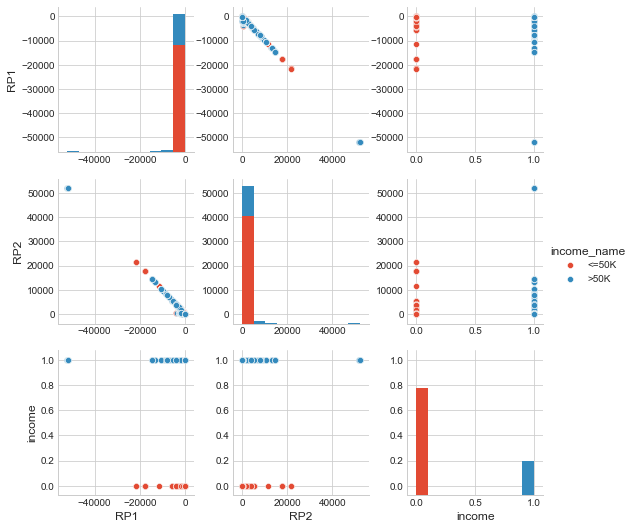

In [107]:
sns.set_style('whitegrid')
sns.pairplot(data_RP_df.iloc[:,[0,1,2,3]], hue='income_name')
plt.show()

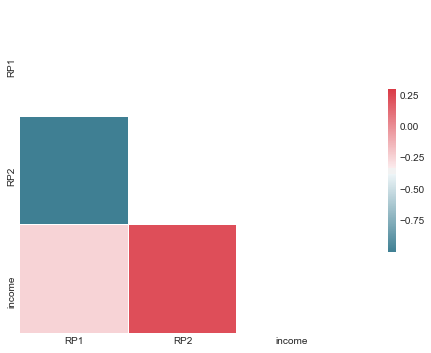

In [108]:
sns.set_style('whitegrid')
plt.figure(figsize=(15,6))
mask = np.zeros_like(d_corr_RP1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(d_corr_RP1,mask=mask, cmap=cmap, vmax=.3,
            square=True,
            linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

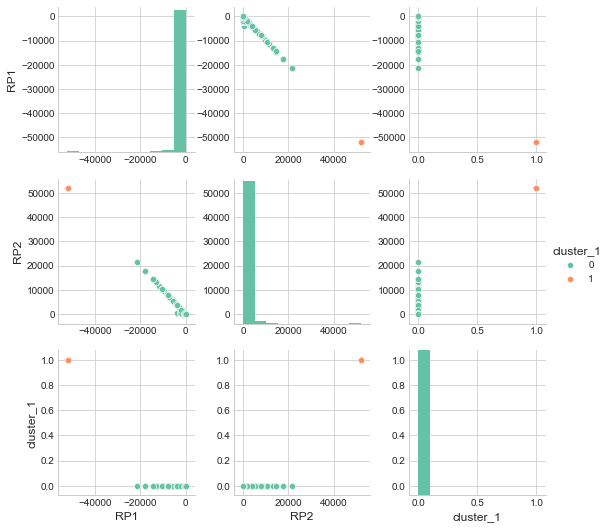

In [109]:
#K=2 K-means
kmeans_model_1 = KMeans(n_clusters=2,random_state=123)
distances_1 = kmeans_model_1.fit_transform(data_RP_df.iloc[:,0:2])
labels_1 = kmeans_model_1.labels_
data_RP_df['cluster_1']=labels_1
with sns.color_palette("Set2", 10):
    sns.pairplot(data_RP_df.iloc[:,[0,1,4]], hue='cluster_1')

In [110]:
#statistics of acceptable_label cluster_1 vs species
tb1 = pd.crosstab(data_RP_df['income_name'],labels_1)
tb1

col_0,0,1
income_name,,
<=50K,24720,0
>50K,7682,159


In [111]:
#cluster_2_label
def cluster_1_label(alpha):
    label_max = max(tb1.iloc[i,alpha] for i in range(2))
    if tb1.iloc[0,alpha] == label_max:
        return '<=50K'
    if tb1.iloc[1,alpha] == label_max:
        return '>50K'
data_RP_df['cluster_1_label']=data_RP_df['cluster_1'].apply(cluster_1_label)
data_RP_df.head()

,RP1,RP2,income,income_name,cluster_1,cluster_1_label
0,-1196.229033,1118.223951,0,<=50K,0,<=50K
1,-23.670244,-24.674751,0,<=50K,0,<=50K
2,-68.123538,-14.361616,0,<=50K,0,<=50K
3,-77.637205,-19.164949,0,<=50K,0,<=50K
4,-67.938467,-15.276383,0,<=50K,0,<=50K


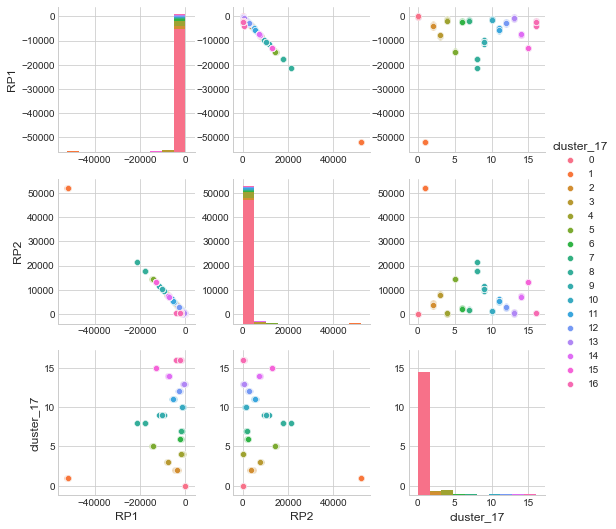

In [112]:
#K=17
kmeans_model_2 = KMeans(n_clusters=17,random_state=123)
distances_2 = kmeans_model_2.fit_transform(data_RP_df.iloc[:,0:3])
labels_2 = kmeans_model_2.labels_
data_RP_df['cluster_17']=labels_2
with sns.color_palette("Set2", 10):
    sns.pairplot(data_RP_df.iloc[:,[0,1,6]], hue='cluster_17')

In [113]:
#compare labels K=17
tb1 = pd.crosstab(data_RP_df['income_name'],labels_2)
tb1

col_0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
income_name,,,,,,,,,,,,,,,,,
<=50K,22958,0,54,0,604,0,181,261,7,1,251,6,144,154,0,0,99
>50K,5391,159,611,358,630,34,58,90,0,39,0,83,136,2,94,15,141


In [114]:
#cluster_2_label

data_RP_df['cluster_17_label']=data_RP_df['cluster_17'].apply(cluster_1_label)
data_RP_df.head()

,RP1,RP2,income,income_name,cluster_1,cluster_1_label,cluster_17,cluster_17_label
0,-1196.229033,1118.223951,0,<=50K,0,<=50K,10,<=50K
1,-23.670244,-24.674751,0,<=50K,0,<=50K,0,<=50K
2,-68.123538,-14.361616,0,<=50K,0,<=50K,0,<=50K
3,-77.637205,-19.164949,0,<=50K,0,<=50K,0,<=50K
4,-67.938467,-15.276383,0,<=50K,0,<=50K,0,<=50K


In [115]:
#find center of K=2
centroids_RP1 = kmeans_model_1.cluster_centers_
print (centroids_RP1)

[[  -455.58105177    304.37825224]
 [-51938.51188223  52021.13738844]]


In [116]:
#find center of K=17
centroids_RP17 = kmeans_model_2.cluster_centers_
print (centroids_RP17)

[[ -6.94885840e+01  -1.34226484e+01   1.90165438e-01]
 [ -5.19385119e+04   5.20211374e+04   1.00000000e+00]
 [ -3.97774107e+03   3.89744012e+03   9.18796992e-01]
 [ -7.88094306e+03   7.80739348e+03   1.00000000e+00]
 [ -1.68599928e+03   1.89640538e+02   5.10534846e-01]
 [ -1.45114073e+04   1.44665232e+04   1.00000000e+00]
 [ -2.21247934e+03   2.13107210e+03   2.42677824e-01]
 [ -1.70948283e+03   1.62507807e+03   2.56410256e-01]
 [ -1.87981251e+04   1.88004598e+04  -5.55111512e-17]
 [ -1.04595237e+04   1.03902786e+04   9.75000000e-01]
 [ -1.25227453e+03   1.17097930e+03  -1.38777878e-15]
 [ -5.38292435e+03   5.30701207e+03   9.32584270e-01]
 [ -2.67861170e+03   2.59800478e+03   4.85714286e-01]
 [ -6.43533463e+02   4.30979370e+02   1.28205128e-02]
 [ -7.33719290e+03   7.27380722e+03   1.00000000e+00]
 [ -1.31493370e+04   1.31006125e+04   1.00000000e+00]
 [ -2.25750112e+03   2.58983216e+02   5.87500000e-01]]


In [1]:
#RP K=2, upon cluster_1
colors = ["g.", "r.", "b.", "y."]
for i in range(len(data_RP_df)):
    plt.plot(data_RP_df.iloc[i,0],data_RP_df.iloc[i,1], colors[data_RP_df.iloc[i,4]], markersize = 10)    
plt.scatter(centroids_RP1[:,0], centroids_RP1[:,1],marker="x", s=150, linewidths =5, zorder=10)
plt.xlabel('RP1')
plt.ylabel('RP2')
plt.show()


NameError: name 'data_RP_df' is not defined

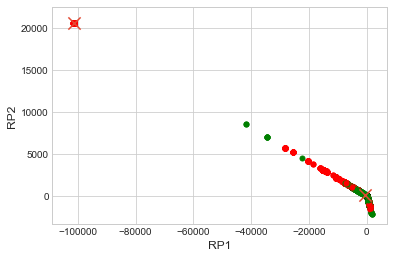

In [68]:
#RP K=2 upon original label
colors = ["g.", "r.", "b.", "y."]
for i in range(len(data_RP_df)):
    plt.plot(data_RP_df.iloc[i,0],data_RP_df.iloc[i,1], colors[data_RP_df.iloc[i,2]], markersize = 10)    
plt.scatter(centroids_RP1[:,0], centroids_RP1[:,1],marker="x", s=150, linewidths =5, zorder=10)
plt.xlabel('RP1')
plt.ylabel('RP2')
plt.show()


In [118]:
data_RP_df.head()

,RP1,RP2,income,income_name,cluster_1,cluster_1_label,cluster_17,cluster_17_label
0,-1196.229033,1118.223951,0,<=50K,0,<=50K,10,<=50K
1,-23.670244,-24.674751,0,<=50K,0,<=50K,0,<=50K
2,-68.123538,-14.361616,0,<=50K,0,<=50K,0,<=50K
3,-77.637205,-19.164949,0,<=50K,0,<=50K,0,<=50K
4,-67.938467,-15.276383,0,<=50K,0,<=50K,0,<=50K


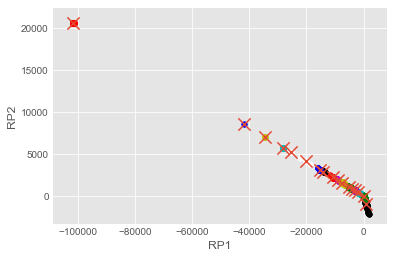

In [77]:
#RP K=17 upon cluster_4
style.use("ggplot")
colors = ["g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w."]
for i in range(len(data_RP_df)):
    plt.plot(data_RP_df.iloc[i,0],data_RP_df.iloc[i,1], colors[data_RP_df.iloc[i,6]], markersize = 10)    
plt.scatter(centroids_RP17[:,0], centroids_RP17[:,1],marker="x", s=150, linewidths =5, zorder=10)
plt.xlabel('RP1')
plt.ylabel('RP2')
plt.show()

In [119]:
d_corr_RP2=data_RP_df.iloc[:,[0,1,4]].corr()
d_corr_RP2
#Correlation K=2 for dataset after RP

,RP1,RP2,cluster_1
RP1,1.000000,-0.996587,-0.935360
RP2,-0.996587,1.000000,0.938459
cluster_1,-0.935360,0.938459,1.000000


In [120]:
d_corr_RP17=data_RP_df.iloc[:,[0,1,6]].corr()
d_corr_RP17
#lug_boot and persons

,RP1,RP2,cluster_17
RP1,1.000000,-0.996587,-0.204257
RP2,-0.996587,1.000000,0.164931
cluster_17,-0.204257,0.164931,1.000000


In [121]:
cluster_2_accuracy = len(data_RP_df[data_RP_df['income_name']==data_RP_df['cluster_1_label']])/len(data_RP_df)
cluster_17_accuracy = len(data_RP_df[data_RP_df['income_name']==data_RP_df['cluster_17_label']])/len(data_RP_df)
print('K=2 KMeans -> {0:.4f}%'.format(cluster_2_accuracy*100))
print('K=17 KMeans -> {0:.4f}%'.format(cluster_17_accuracy*100))

K=2 KMeans -> 76.4074%
K=17 KMeans -> 80.2187%


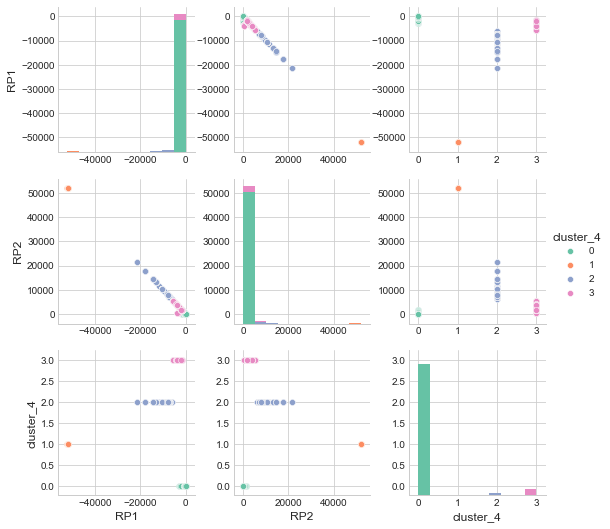

In [122]:
#K=4
kmeans_model_3 = KMeans(n_clusters=4,random_state=123)
distances_3 = kmeans_model_3.fit_transform(data_RP_df.iloc[:,0:3])
labels_3 = kmeans_model_3.labels_
data_RP_df['cluster_4']=labels_3
with sns.color_palette("Set2", 10):
    sns.pairplot(data_RP_df.iloc[:,[0,1,8]], hue='cluster_4')

In [123]:
#compare labels K=4
tb1 = pd.crosstab(data_RP_df['income_name'],labels_3)
tb1

col_0,0,1,2,3
income_name,,,,
<=50K,24149,0,8,563
>50K,6163,159,542,977


In [124]:
#cluster_2_label

data_RP_df['cluster_4_label']=data_RP_df['cluster_4'].apply(cluster_1_label)
data_RP_df.head()

,RP1,RP2,income,income_name,cluster_1,cluster_1_label,cluster_17,cluster_17_label,cluster_4,cluster_4_label
0,-1196.229033,1118.223951,0,<=50K,0,<=50K,10,<=50K,0,<=50K
1,-23.670244,-24.674751,0,<=50K,0,<=50K,0,<=50K,0,<=50K
2,-68.123538,-14.361616,0,<=50K,0,<=50K,0,<=50K,0,<=50K
3,-77.637205,-19.164949,0,<=50K,0,<=50K,0,<=50K,0,<=50K
4,-67.938467,-15.276383,0,<=50K,0,<=50K,0,<=50K,0,<=50K


In [126]:
cluster_4_accuracy = len(data_RP_df[data_RP_df['income_name']==data_RP_df['cluster_4_label']])/len(data_RP_df)
print('K=4 KMeans -> {0:.4f}%'.format(cluster_4_accuracy*100))

K=4 KMeans -> 79.3188%


In [127]:
#find center of K=4
centroids_RP4 = kmeans_model_3.cluster_centers_
print (centroids_RP4)

[[ -1.68827131e+02   1.34729830e+01   2.03318818e-01]
 [ -5.19385119e+04   5.20211374e+04   1.00000000e+00]
 [ -8.66173773e+03   8.59359751e+03   9.85454545e-01]
 [ -3.16902175e+03   3.06986522e+03   6.34415584e-01]]


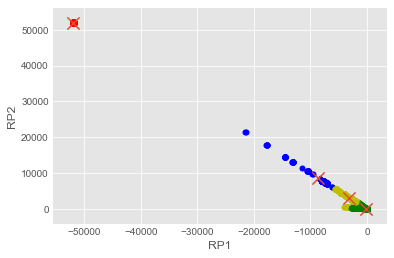

In [128]:
#RP K=4 upon cluster_4
style.use("ggplot")
colors = ["g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w.",
          "g.", "r.", "b.", "y.", "c.", "m.", "k.", "w."]
for i in range(len(data_RP_df)):
    plt.plot(data_RP_df.iloc[i,0],data_RP_df.iloc[i,1], colors[data_RP_df.iloc[i,8]], markersize = 10)    
plt.scatter(centroids_RP4[:,0], centroids_RP4[:,1],marker="x", s=150, linewidths =5, zorder=10)
plt.xlabel('RP1')
plt.ylabel('RP2')
plt.show()